In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

/Users/bp/opt/miniconda3/envs/udemy/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/q6/kztts0vn7610dqsjfrs11s900000gn/T/ipykernel_55383/3566591865.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Now we'll learn how ot visualize multiple regression with lmplot()

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")

In [3]:
# Preview
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


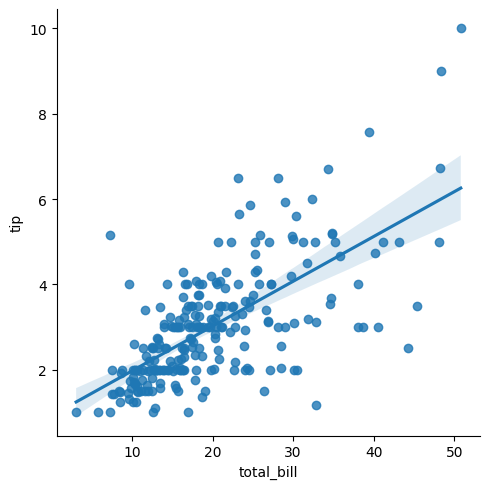

In [5]:
# Let's use lmplot() to plot the total bill versus tips
# sns.lmplot("total_bill","tip",tips) # lmplot() takes 1 positional argument but 3 were given
sns.lmplot(tips, x='total_bill',y='tip')

In [ ]:
# First we can see a scatter plot of all the points, tip vs total_bill
# Then we see a linear regression line, which is an estimateed linear fit model to the data

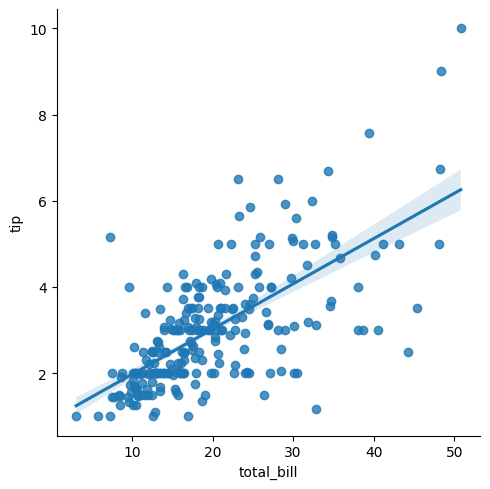

In [6]:
# WE can also specify teh confidence interval to use for the linear fit

sns.lmplot(tips, x='total_bill',y='tip',ci=75) # 68% ci

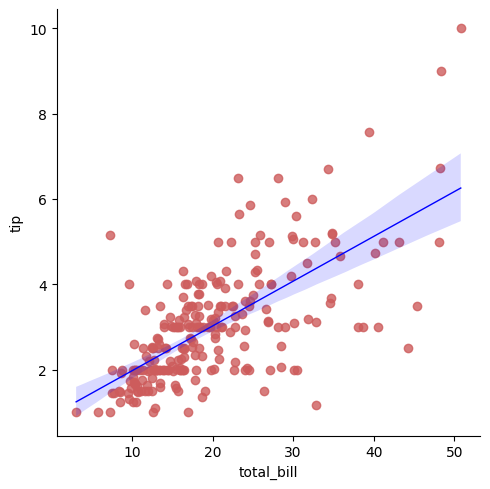

In [8]:
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot(tips, x='total_bill',y='tip',
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

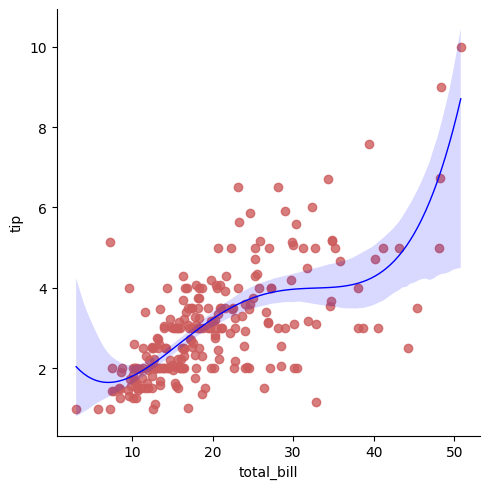

In [10]:
# WE can also check out higher-order trends -> polynomial regression
sns.lmplot(tips, x='total_bill',y='tip', order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

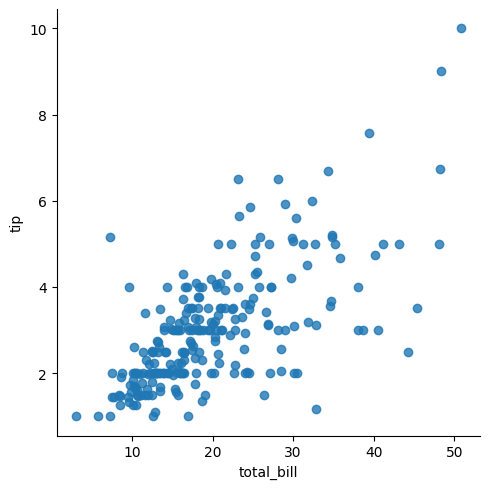

In [11]:
# We can also not fit a regression if desired -> just a scatterplot
sns.lmplot(tips, x='total_bill',y='tip', fit_reg=False)

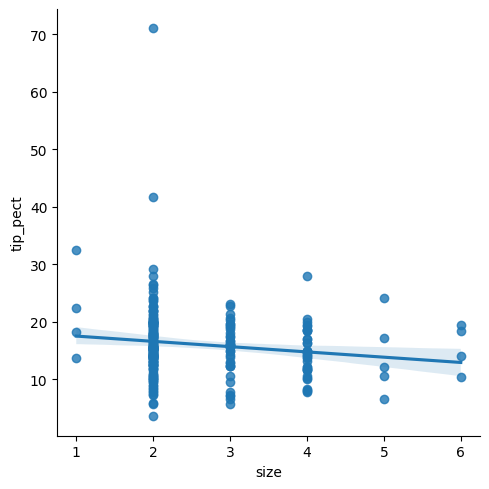

In [12]:
# lmplot() also works on discrete variables, such as the percentage of the tip

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])

#plot
sns.lmplot(tips, x='size',y='tip_pect');

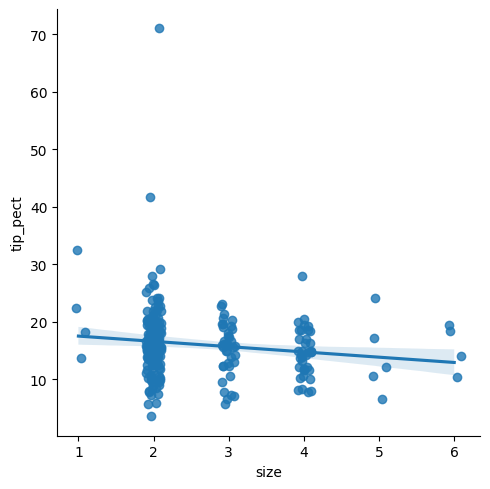

In [13]:
# We can also add jitter to this

#Info link -> jitter is apparently not related to this topic but I can imagine a way to removed a bit of overlap between points of same x
url = "http://en.wikipedia.org/wiki/Jitter"

#plot
sns.lmplot(tips, x='size',y='tip_pect', x_jitter=.1);

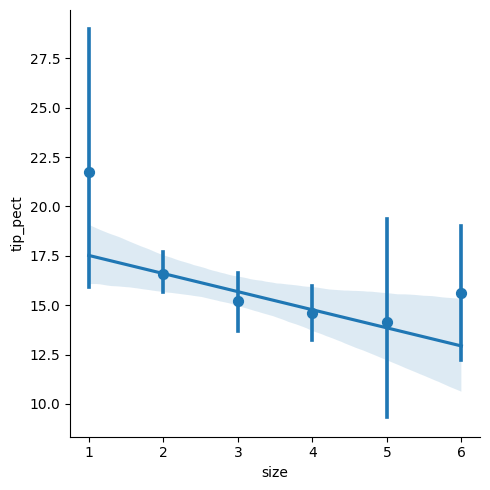

In [15]:
# We can also estimate the tendency of each bin (size of party in this case) -> now instead of the cloud of points on the same x we have the mean of the
# the % of tips (and quartiles?)
sns.lmplot(tips, x='size',y='tip_pect', x_estimator=np.mean);

In [ ]:
# Interesting, looks like there is more variance for party sizes of 1 then 2-4

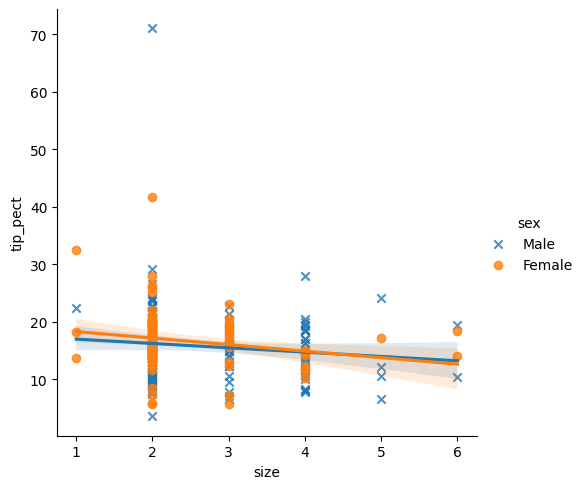

In [17]:
# We can use the hue facet to automatically define subsets along a column -> gender is defined by color and marker

# Plot, note the markers argument
sns.lmplot(tips, x='size',y='tip_pect', hue="sex",markers=["x","o"])

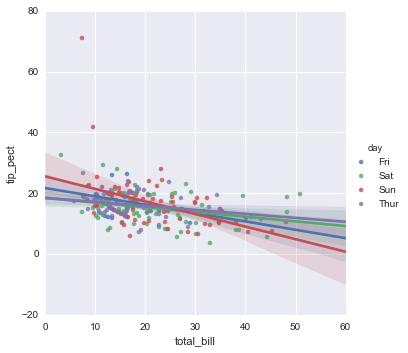

In [ ]:
# Does day make a difference?
sns.lmplot(tips, x='size',y='tip_pect', hue="day")

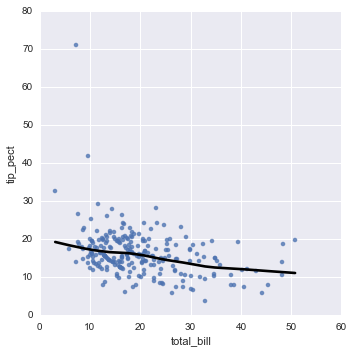

In [ ]:
# Finally it should be noted that Seabron supports LOESS model fitting
# url = 'http://en.wikipedia.org/wiki/Local_regression'
# update link -> https://en.wikipedia.org/wiki/Local_regression

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

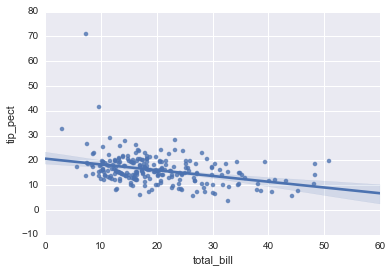

In [ ]:
# The lmplot() we've been using is actually using a lower-level function, regplot() -> regression plot

sns.regplot("total_bill","tip_pect",tips)

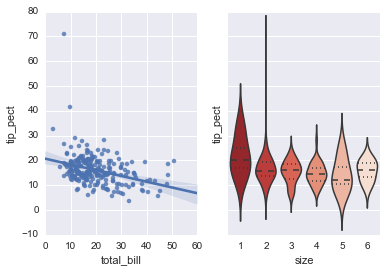

In [ ]:
# reg_plot can be added to existing axes without modifying anything in the figure

# Create figure with 2 subplots
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(tips['tip_pect'],tips['size'],color='Reds_r',ax=axis2)